El área de marketing tiene la sospecha que las puntaciones de calidad de los productos están decreciendo. El objetivo del área de marketing es lograr una puntación de calidad alrededor de 8 (ocho) para los vinos blancos y 7 (siete) para los vinos tintos. Solicitan al área de calidad que analicen el proceso general de fabricación de vinos, informen lo observado, encuentren las posibles causas y que se debe corregir para lograr los objetivos especificados.  

**Variables del Dataset:**
- **Acidez Fija**: La mayoría de los ácidos del vino son fijos o no volátiles (no se evaporan fácilmente). Incluyen ácidos tartárico, málico y láctico. Aportan estructura y frescura al vino.
- **Acidez Volátil**: Cantidad de ácido acético en el vino. En exceso indica deterioro bacteriano y produce sabor/olor a vinagre. Debe mantenerse bajo.
- **Ácido Cítrico**: Se encuentra en pequeñas cantidades. Aporta 'frescura' y sabor cítrico al vino. Más común en vinos tintos jóvenes.
- **Azúcar Residual**: Cantidad de azúcar que queda después de que se detiene la fermentación. Determina si el vino es seco, semiseco o dulce.
- **Cloruro**: Cantidad de sal (cloruro de sodio) en el vino. Proviene del suelo, agua y materia prima. En exceso afecta negativamente el sabor.
- **Dióxido de Azufre Libre**: Forma libre de SO₂ en equilibrio entre SO₂ molecular (gas disuelto) y ion bisulfito. Previene crecimiento microbiano y oxidación del vino.
- **Dióxido de Azufre Total**: Cantidad total de formas libres y ligadas de SO₂. En bajas concentraciones es indetectable, pero sobre 50 ppm se nota en nariz y paladar.
- **Densidad**: Masa por unidad de volumen. Relacionada con el contenido de azúcar y alcohol. Disminuye a medida que el azúcar se convierte en alcohol.
- **pH**: Describe qué tan ácida o básica es una sustancia en escala de 0 (muy ácida) a 14 (muy básica). Afecta color, estabilidad y sabor del vino.
- **Sulfatos**: Aditivo del vino (sulfato de potasio) que contribuye a niveles de SO₂. Actúa como antimicrobiano y antioxidante.
- **Alcohol**: Porcentaje de contenido alcohólico del vino (% vol). Producto de la fermentación de azúcares por levaduras.
- **Calidad**: Puntuación sensorial entre 0 y 10 asignada por evaluadores expertos.

**Consigna**: Utilizar los distintos conceptos aprendidos en la materia e implemente un proyecto de mejora, que encuentre las posibles causas que afectan a la calidad de los vinos, determine los valores que se deberían obtener para mejorar y lograr el objetivo de marketing.

Solo deben usarse las siguientes herramientas si creen que son necesarias para el análisis:
* LISTA DE VERIFICACIÓN
* HISTOGRAMA
* DIAGRAMA DE PARETO
* DIAGRAMA DE FLUJO
* DIAGRAMA DE CAUSA-EFECTO
* DIAGRAMA DE CONTROL
* DIAGRAMA DE DISPERSIÓN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
whiteWinePath = '../data/raw/whitewine.csv'
redWinePath = '../data/raw/redwine.csv'
df_whiteWine = pd.read_csv(whiteWinePath, sep=',')
df_redWine = pd.read_csv(redWinePath, sep=',')

In [3]:
df_whiteWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Acidez Fija              4898 non-null   float64
 1   Acidez Volatil           4898 non-null   float64
 2   Acido citrico            4898 non-null   float64
 3   Azucar Residual          4898 non-null   float64
 4   Cloruro                  4898 non-null   float64
 5   Dióxido de azufre libre  4898 non-null   float64
 6   Dióxido de azufre total  4898 non-null   float64
 7   Densidad                 4898 non-null   float64
 8   pH                       4898 non-null   float64
 9   Sulfatos                 4898 non-null   float64
 10  Alcohol                  4898 non-null   float64
 11  Calidad                  4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df_whiteWine.describe()

,Acidez Fija,Acidez Volatil,Acido citrico,Azucar Residual,Cloruro,Dióxido de azufre libre,Dióxido de azufre total,Densidad,pH,Sulfatos,Alcohol,Calidad
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
df_redWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Acidez Fija              1599 non-null   float64
 1   Acidez Volatil           1599 non-null   float64
 2   Acido citrico            1599 non-null   float64
 3   Azucar Residual          1599 non-null   float64
 4   Cloruro                  1599 non-null   float64
 5   Dióxido de azufre libre  1599 non-null   float64
 6   Dióxido de azufre total  1599 non-null   float64
 7   Densidad                 1599 non-null   float64
 8   pH                       1599 non-null   float64
 9   Sulfatos                 1599 non-null   float64
 10  Alcohol                  1599 non-null   float64
 11  Calidad                  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df_redWine.describe()

,Acidez Fija,Acidez Volatil,Acido citrico,Azucar Residual,Cloruro,Dióxido de azufre libre,Dióxido de azufre total,Densidad,pH,Sulfatos,Alcohol,Calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## ANÁLISIS DE CALIDAD DE VINOS

### Objetivo:
- **Vinos Blancos**: Calidad objetivo = 8
- **Vinos Tintos**: Calidad objetivo = 7

### 1. LISTA DE VERIFICACIÓN - Análisis de Calidad Actual

In [7]:
# Lista de verificación: Distribución de calidad actual
print("="*60)
print("LISTA DE VERIFICACIÓN - DISTRIBUCIÓN DE CALIDAD ACTUAL")
print("="*60)

print("\n📊 VINOS BLANCOS:")
print("-" * 40)
white_quality_dist = df_whiteWine['Calidad'].value_counts().sort_index()
print(white_quality_dist)
print(f"\nCalidad Promedio: {df_whiteWine['Calidad'].mean():.2f}")
print(f"Objetivo: 8")
print(f"Gap: {8 - df_whiteWine['Calidad'].mean():.2f}")
print(f"% con Calidad >= 8: {(df_whiteWine['Calidad'] >= 8).sum() / len(df_whiteWine) * 100:.2f}%")

print("\n🍷 VINOS TINTOS:")
print("-" * 40)
red_quality_dist = df_redWine['Calidad'].value_counts().sort_index()
print(red_quality_dist)
print(f"\nCalidad Promedio: {df_redWine['Calidad'].mean():.2f}")
print(f"Objetivo: 7")
print(f"Gap: {7 - df_redWine['Calidad'].mean():.2f}")
print(f"% con Calidad >= 7: {(df_redWine['Calidad'] >= 7).sum() / len(df_redWine) * 100:.2f}%")

LISTA DE VERIFICACIÓN - DISTRIBUCIÓN DE CALIDAD ACTUAL

📊 VINOS BLANCOS:
----------------------------------------
Calidad
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

Calidad Promedio: 5.88
Objetivo: 8
Gap: 2.12
% con Calidad >= 8: 3.67%

🍷 VINOS TINTOS:
----------------------------------------
Calidad
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Calidad Promedio: 5.64
Objetivo: 7
Gap: 1.36
% con Calidad >= 7: 13.57%


### 2. HISTOGRAMA - Distribución de Calidad

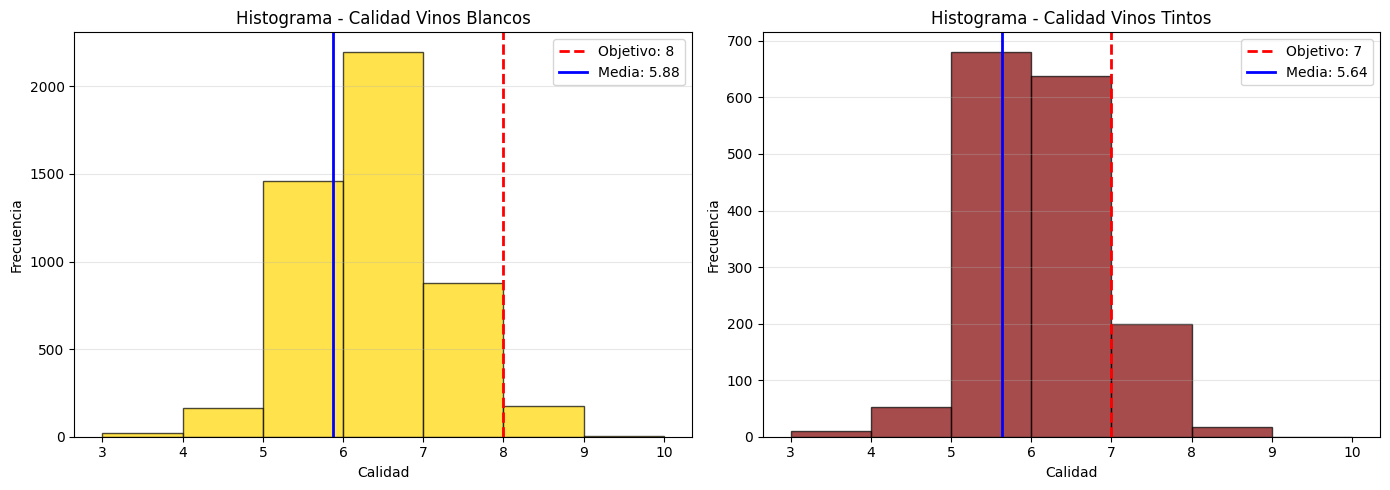

In [8]:
# Histogramas de distribución de calidad
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Vino Blanco
axes[0].hist(df_whiteWine['Calidad'], bins=range(3, 11), edgecolor='black', alpha=0.7, color='gold')
axes[0].axvline(x=8, color='red', linestyle='--', linewidth=2, label='Objetivo: 8')
axes[0].axvline(x=df_whiteWine['Calidad'].mean(), color='blue', linestyle='-', linewidth=2, label=f'Media: {df_whiteWine["Calidad"].mean():.2f}')
axes[0].set_xlabel('Calidad')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma - Calidad Vinos Blancos')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Vino Tinto
axes[1].hist(df_redWine['Calidad'], bins=range(3, 11), edgecolor='black', alpha=0.7, color='maroon')
axes[1].axvline(x=7, color='red', linestyle='--', linewidth=2, label='Objetivo: 7')
axes[1].axvline(x=df_redWine['Calidad'].mean(), color='blue', linestyle='-', linewidth=2, label=f'Media: {df_redWine["Calidad"].mean():.2f}')
axes[1].set_xlabel('Calidad')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma - Calidad Vinos Tintos')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 3. DIAGRAMA DE CONTROL - Monitoreo de Calidad

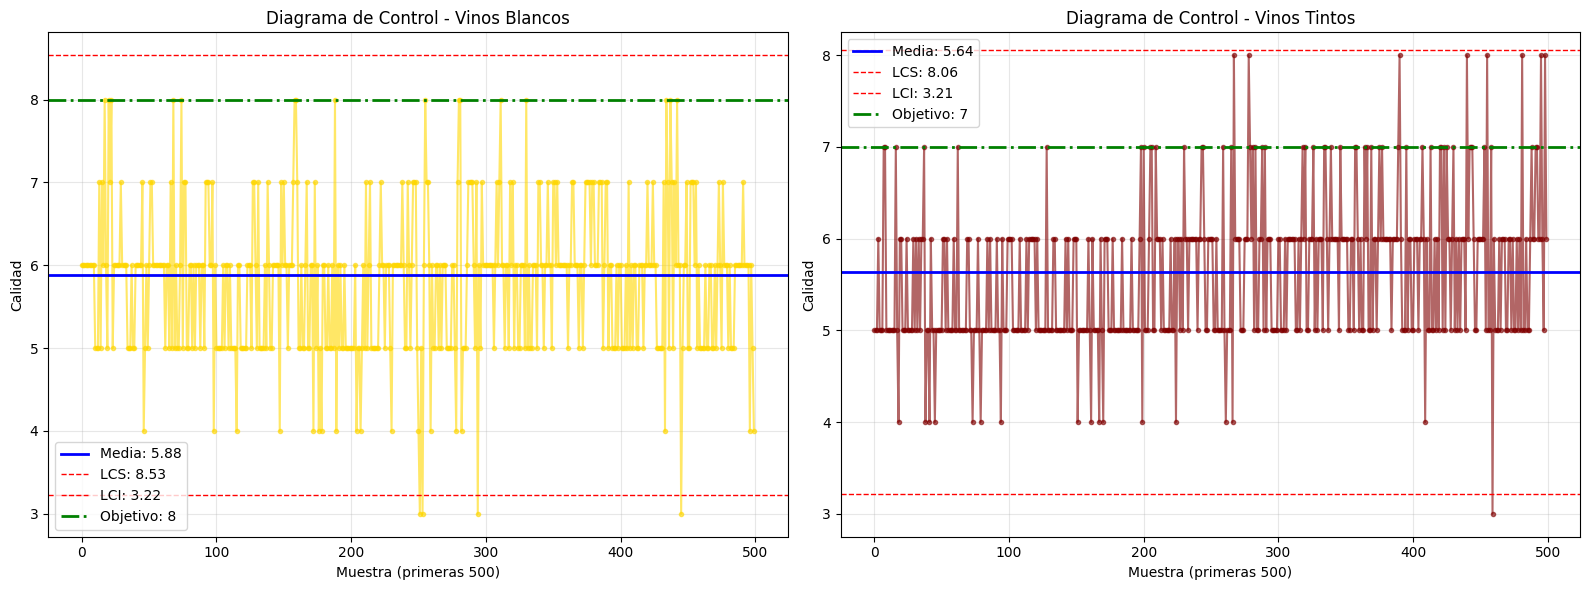


Vino Blanco - Proceso FUERA DE CONTROL
Media actual: 5.88, Objetivo: 8.00, Gap: 2.12

Vino Tinto - Proceso FUERA DE CONTROL
Media actual: 5.64, Objetivo: 7.00, Gap: 1.36


In [9]:
# Diagrama de control para calidad
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Vino Blanco
white_mean = df_whiteWine['Calidad'].mean()
white_std = df_whiteWine['Calidad'].std()
white_ucl = white_mean + 3 * white_std  # Límite superior de control
white_lcl = white_mean - 3 * white_std  # Límite inferior de control

axes[0].plot(df_whiteWine.index[:500], df_whiteWine['Calidad'][:500], marker='o', markersize=3, linestyle='-', alpha=0.6, color='gold')
axes[0].axhline(y=white_mean, color='blue', linestyle='-', linewidth=2, label=f'Media: {white_mean:.2f}')
axes[0].axhline(y=white_ucl, color='red', linestyle='--', linewidth=1, label=f'LCS: {white_ucl:.2f}')
axes[0].axhline(y=white_lcl, color='red', linestyle='--', linewidth=1, label=f'LCI: {white_lcl:.2f}')
axes[0].axhline(y=8, color='green', linestyle='-.', linewidth=2, label='Objetivo: 8')
axes[0].set_xlabel('Muestra (primeras 500)')
axes[0].set_ylabel('Calidad')
axes[0].set_title('Diagrama de Control - Vinos Blancos')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Vino Tinto
red_mean = df_redWine['Calidad'].mean()
red_std = df_redWine['Calidad'].std()
red_ucl = red_mean + 3 * red_std
red_lcl = red_mean - 3 * red_std

axes[1].plot(df_redWine.index[:500], df_redWine['Calidad'][:500], marker='o', markersize=3, linestyle='-', alpha=0.6, color='maroon')
axes[1].axhline(y=red_mean, color='blue', linestyle='-', linewidth=2, label=f'Media: {red_mean:.2f}')
axes[1].axhline(y=red_ucl, color='red', linestyle='--', linewidth=1, label=f'LCS: {red_ucl:.2f}')
axes[1].axhline(y=red_lcl, color='red', linestyle='--', linewidth=1, label=f'LCI: {red_lcl:.2f}')
axes[1].axhline(y=7, color='green', linestyle='-.', linewidth=2, label='Objetivo: 7')
axes[1].set_xlabel('Muestra (primeras 500)')
axes[1].set_ylabel('Calidad')
axes[1].set_title('Diagrama de Control - Vinos Tintos')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nVino Blanco - Proceso {'FUERA DE CONTROL' if white_mean < 8 else 'EN CONTROL'}")
print(f"Media actual: {white_mean:.2f}, Objetivo: 8.00, Gap: {8 - white_mean:.2f}")
print(f"\nVino Tinto - Proceso {'FUERA DE CONTROL' if red_mean < 7 else 'EN CONTROL'}")
print(f"Media actual: {red_mean:.2f}, Objetivo: 7.00, Gap: {7 - red_mean:.2f}")

#### Gráfico Integrado: Histograma + Diagrama de Control

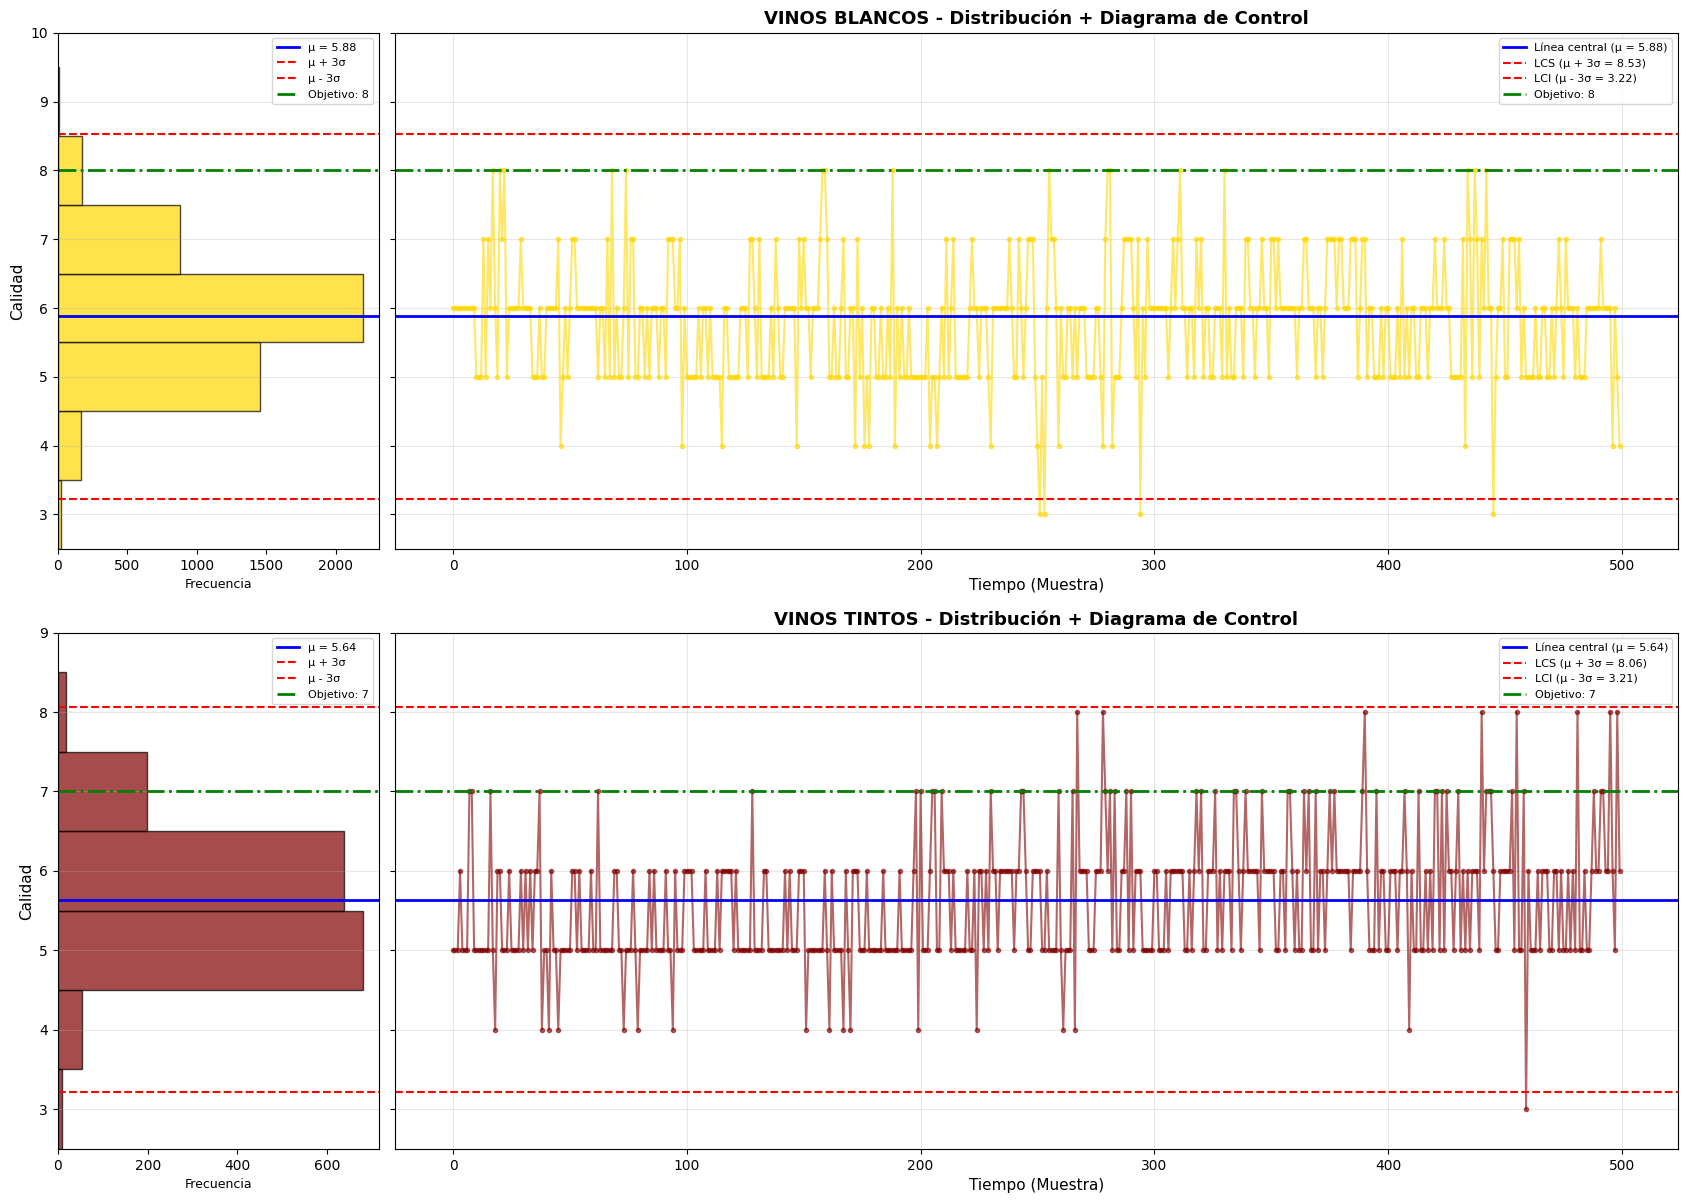

INTERPRETACIÓN DEL GRÁFICO INTEGRADO

El histograma lateral muestra la DISTRIBUCIÓN de frecuencias de calidad:
  - Forma de la curva de distribución
  - Concentración de valores respecto a la media (μ)
  - Comparación visual con el objetivo

El diagrama de control muestra la VARIABILIDAD en el TIEMPO:
  - Tendencias y patrones temporales
  - Puntos fuera de límites de control (causas especiales)
  - Estabilidad del proceso

⚠️  ESTADO ACTUAL:
  • Vinos Blancos: Proceso FUERA DE CONTROL (μ=5.88 < Objetivo=8)
  • Vinos Tintos: Proceso FUERA DE CONTROL (μ=5.64 < Objetivo=7)

✓ La distribución está desplazada hacia la IZQUIERDA del objetivo
✓ Se requiere ACCIÓN CORRECTIVA para centrar el proceso en el objetivo


In [10]:
# Gráfico combinado: Histograma lateral + Diagrama de Control
from matplotlib.gridspec import GridSpec

# Crear figura con 2 filas (una para vino blanco, otra para tinto)
fig = plt.figure(figsize=(18, 12))

# ============= VINO BLANCO =============
# Definir grid para la parte superior (vino blanco)
gs_white = GridSpec(1, 2, figure=fig, left=0.08, right=0.98, top=0.95, bottom=0.52, 
                    width_ratios=[1, 4], wspace=0.02)

# Histograma lateral (izquierda) - Vino Blanco
ax_hist_white = fig.add_subplot(gs_white[0, 0])
# Rotar el histograma 90 grados (horizontal)
counts_white, bins_white, patches_white = ax_hist_white.hist(df_whiteWine['Calidad'], 
                                                               bins=np.arange(2.5, 10.5, 1), 
                                                               orientation='horizontal',
                                                               alpha=0.7, color='gold', 
                                                               edgecolor='black')

# Líneas de referencia en el histograma
white_mean = df_whiteWine['Calidad'].mean()
white_std = df_whiteWine['Calidad'].std()
white_ucl = white_mean + 3 * white_std
white_lcl = white_mean - 3 * white_std

ax_hist_white.axhline(y=white_mean, color='blue', linestyle='-', linewidth=2, label=f'μ = {white_mean:.2f}')
ax_hist_white.axhline(y=white_ucl, color='red', linestyle='--', linewidth=1.5, label=f'μ + 3σ')
ax_hist_white.axhline(y=white_lcl, color='red', linestyle='--', linewidth=1.5, label=f'μ - 3σ')
ax_hist_white.axhline(y=8, color='green', linestyle='-.', linewidth=2, label='Objetivo: 8')

ax_hist_white.set_ylabel('Calidad', fontsize=11)
ax_hist_white.set_xlabel('Frecuencia', fontsize=9)
ax_hist_white.set_ylim([2.5, 10])
ax_hist_white.legend(loc='upper right', fontsize=8)
ax_hist_white.grid(alpha=0.3, axis='y')

# Diagrama de Control (derecha) - Vino Blanco
ax_control_white = fig.add_subplot(gs_white[0, 1])
ax_control_white.plot(df_whiteWine.index[:500], df_whiteWine['Calidad'][:500], 
                      marker='o', markersize=3, linestyle='-', alpha=0.6, color='gold')
ax_control_white.axhline(y=white_mean, color='blue', linestyle='-', linewidth=2, label=f'Línea central (μ = {white_mean:.2f})')
ax_control_white.axhline(y=white_ucl, color='red', linestyle='--', linewidth=1.5, label=f'LCS (μ + 3σ = {white_ucl:.2f})')
ax_control_white.axhline(y=white_lcl, color='red', linestyle='--', linewidth=1.5, label=f'LCI (μ - 3σ = {white_lcl:.2f})')
ax_control_white.axhline(y=8, color='green', linestyle='-.', linewidth=2, label='Objetivo: 8')

ax_control_white.set_xlabel('Tiempo (Muestra)', fontsize=11)
ax_control_white.set_ylabel('')
ax_control_white.set_ylim([2.5, 10])
ax_control_white.set_title('VINOS BLANCOS - Distribución + Diagrama de Control', fontsize=13, fontweight='bold')
ax_control_white.legend(loc='upper right', fontsize=8)
ax_control_white.grid(alpha=0.3)
ax_control_white.set_yticklabels([])  # Ocultar etiquetas del eje Y

# ============= VINO TINTO =============
# Definir grid para la parte inferior (vino tinto)
gs_red = GridSpec(1, 2, figure=fig, left=0.08, right=0.98, top=0.45, bottom=0.02, 
                  width_ratios=[1, 4], wspace=0.02)

# Histograma lateral (izquierda) - Vino Tinto
ax_hist_red = fig.add_subplot(gs_red[0, 0])
counts_red, bins_red, patches_red = ax_hist_red.hist(df_redWine['Calidad'], 
                                                       bins=np.arange(2.5, 9.5, 1), 
                                                       orientation='horizontal',
                                                       alpha=0.7, color='maroon', 
                                                       edgecolor='black')

# Líneas de referencia en el histograma
red_mean = df_redWine['Calidad'].mean()
red_std = df_redWine['Calidad'].std()
red_ucl = red_mean + 3 * red_std
red_lcl = red_mean - 3 * red_std

ax_hist_red.axhline(y=red_mean, color='blue', linestyle='-', linewidth=2, label=f'μ = {red_mean:.2f}')
ax_hist_red.axhline(y=red_ucl, color='red', linestyle='--', linewidth=1.5, label=f'μ + 3σ')
ax_hist_red.axhline(y=red_lcl, color='red', linestyle='--', linewidth=1.5, label=f'μ - 3σ')
ax_hist_red.axhline(y=7, color='green', linestyle='-.', linewidth=2, label='Objetivo: 7')

ax_hist_red.set_ylabel('Calidad', fontsize=11)
ax_hist_red.set_xlabel('Frecuencia', fontsize=9)
ax_hist_red.set_ylim([2.5, 9])
ax_hist_red.legend(loc='upper right', fontsize=8)
ax_hist_red.grid(alpha=0.3, axis='y')

# Diagrama de Control (derecha) - Vino Tinto
ax_control_red = fig.add_subplot(gs_red[0, 1])
ax_control_red.plot(df_redWine.index[:500], df_redWine['Calidad'][:500], 
                    marker='o', markersize=3, linestyle='-', alpha=0.6, color='maroon')
ax_control_red.axhline(y=red_mean, color='blue', linestyle='-', linewidth=2, label=f'Línea central (μ = {red_mean:.2f})')
ax_control_red.axhline(y=red_ucl, color='red', linestyle='--', linewidth=1.5, label=f'LCS (μ + 3σ = {red_ucl:.2f})')
ax_control_red.axhline(y=red_lcl, color='red', linestyle='--', linewidth=1.5, label=f'LCI (μ - 3σ = {red_lcl:.2f})')
ax_control_red.axhline(y=7, color='green', linestyle='-.', linewidth=2, label='Objetivo: 7')

ax_control_red.set_xlabel('Tiempo (Muestra)', fontsize=11)
ax_control_red.set_ylabel('')
ax_control_red.set_ylim([2.5, 9])
ax_control_red.set_title('VINOS TINTOS - Distribución + Diagrama de Control', fontsize=13, fontweight='bold')
ax_control_red.legend(loc='upper right', fontsize=8)
ax_control_red.grid(alpha=0.3)
ax_control_red.set_yticklabels([])  # Ocultar etiquetas del eje Y

plt.show()

# Interpretación
print("=" * 70)
print("INTERPRETACIÓN DEL GRÁFICO INTEGRADO")
print("=" * 70)
print("\nEl histograma lateral muestra la DISTRIBUCIÓN de frecuencias de calidad:")
print("  - Forma de la curva de distribución")
print("  - Concentración de valores respecto a la media (μ)")
print("  - Comparación visual con el objetivo")
print("\nEl diagrama de control muestra la VARIABILIDAD en el TIEMPO:")
print("  - Tendencias y patrones temporales")
print("  - Puntos fuera de límites de control (causas especiales)")
print("  - Estabilidad del proceso")
print("\n⚠️  ESTADO ACTUAL:")
print(f"  • Vinos Blancos: Proceso FUERA DE CONTROL (μ={white_mean:.2f} < Objetivo=8)")
print(f"  • Vinos Tintos: Proceso FUERA DE CONTROL (μ={red_mean:.2f} < Objetivo=7)")
print("\n✓ La distribución está desplazada hacia la IZQUIERDA del objetivo")
print("✓ Se requiere ACCIÓN CORRECTIVA para centrar el proceso en el objetivo")
print("=" * 70)

### 4. DIAGRAMA DE DISPERSIÓN - Correlación con Calidad

In [11]:
# Análisis de correlación con calidad
print("CORRELACIÓN DE VARIABLES CON CALIDAD\n")

print("📊 VINOS BLANCOS:")
print("-" * 50)
white_corr = df_whiteWine.corr()['Calidad'].sort_values(ascending=False)
print(white_corr)

print("\n🍷 VINOS TINTOS:")
print("-" * 50)
red_corr = df_redWine.corr()['Calidad'].sort_values(ascending=False)
print(red_corr)

# Identificar las 3 variables más importantes para cada tipo (por valor absoluto)
white_corr_abs = white_corr.abs().sort_values(ascending=False)
red_corr_abs = red_corr.abs().sort_values(ascending=False)

print("\n" + "="*60)
print("VARIABLES MÁS INFLUYENTES (Top 3 - por valor absoluto):")
print("="*60)
print("\nVinos Blancos:")
print(white_corr[white_corr_abs[1:4].index])
print("\nVinos Tintos:")
print(red_corr[red_corr_abs[1:4].index])

CORRELACIÓN DE VARIABLES CON CALIDAD

📊 VINOS BLANCOS:
--------------------------------------------------
Calidad                    1.000000
Alcohol                    0.435575
pH                         0.099427
Sulfatos                   0.053678
Dióxido de azufre libre    0.008158
Acido citrico             -0.009209
Azucar Residual           -0.097577
Acidez Fija               -0.113663
Dióxido de azufre total   -0.174737
Acidez Volatil            -0.194723
Cloruro                   -0.209934
Densidad                  -0.307123
Name: Calidad, dtype: float64

🍷 VINOS TINTOS:
--------------------------------------------------
Calidad                    1.000000
Alcohol                    0.476166
Sulfatos                   0.251397
Acido citrico              0.226373
Acidez Fija                0.124052
Azucar Residual            0.013732
Dióxido de azufre libre   -0.050656
pH                        -0.057731
Cloruro                   -0.128907
Densidad                  -0.174919
Dióx

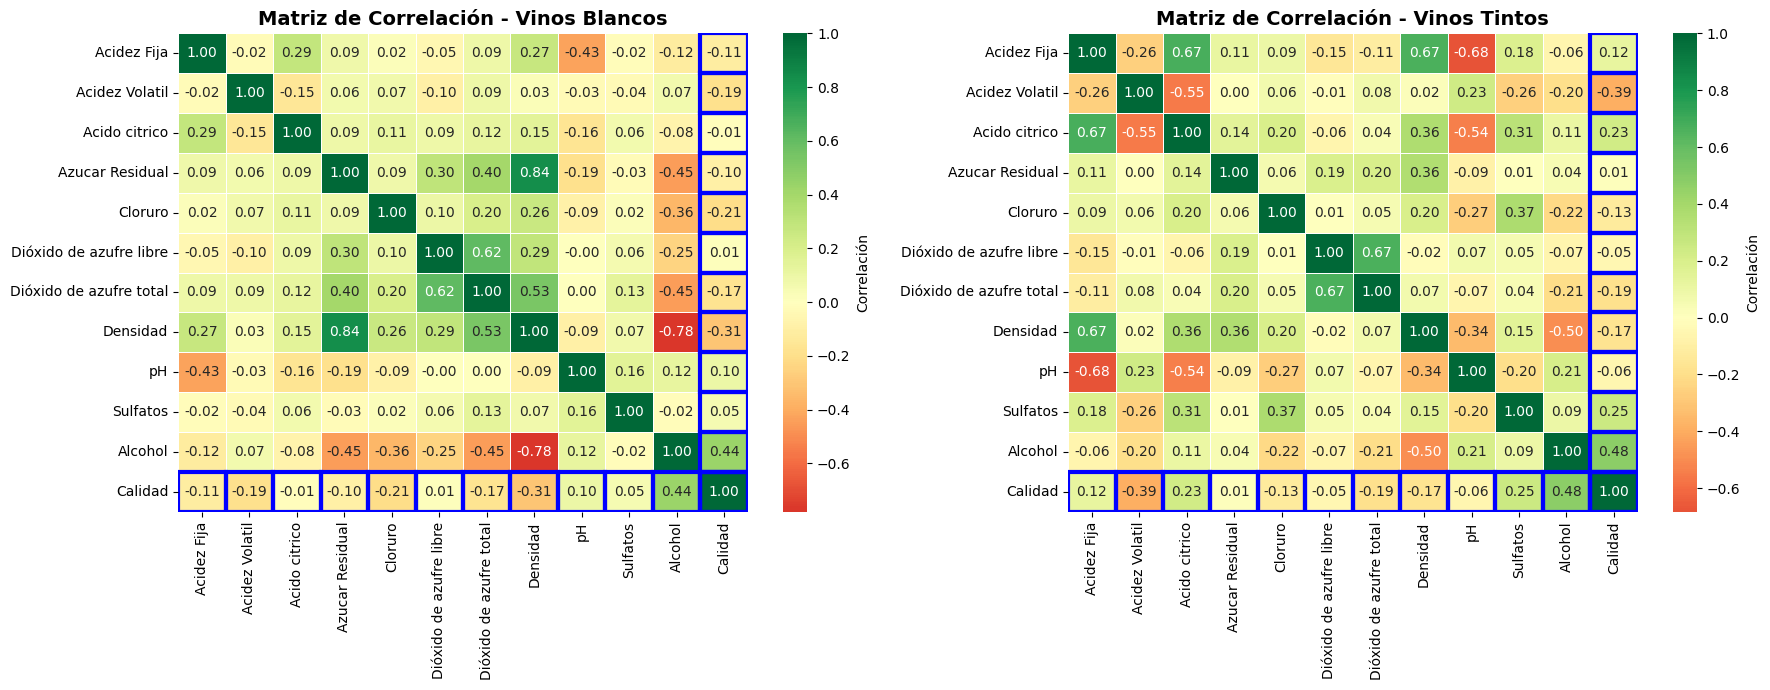

In [12]:
# Matrices de correlación visualizadas con heatmap
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Vino Blanco - Matriz de correlación
white_corr_matrix = df_whiteWine.corr()
sns.heatmap(white_corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0, 
            ax=axes[0], cbar_kws={'label': 'Correlación'}, linewidths=0.5)
axes[0].set_title('Matriz de Correlación - Vinos Blancos', fontsize=14, fontweight='bold')

# Destacar la columna de Calidad
for i in range(len(white_corr_matrix)):
    axes[0].add_patch(plt.Rectangle((11, i), 1, 1, fill=False, edgecolor='blue', lw=3))
    axes[0].add_patch(plt.Rectangle((i, 11), 1, 1, fill=False, edgecolor='blue', lw=3))

# Vino Tinto - Matriz de correlación
red_corr_matrix = df_redWine.corr()
sns.heatmap(red_corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0, 
            ax=axes[1], cbar_kws={'label': 'Correlación'}, linewidths=0.5)
axes[1].set_title('Matriz de Correlación - Vinos Tintos', fontsize=14, fontweight='bold')

# Destacar la columna de Calidad
for i in range(len(red_corr_matrix)):
    axes[1].add_patch(plt.Rectangle((11, i), 1, 1, fill=False, edgecolor='blue', lw=3))
    axes[1].add_patch(plt.Rectangle((i, 11), 1, 1, fill=False, edgecolor='blue', lw=3))

plt.tight_layout()
plt.show()

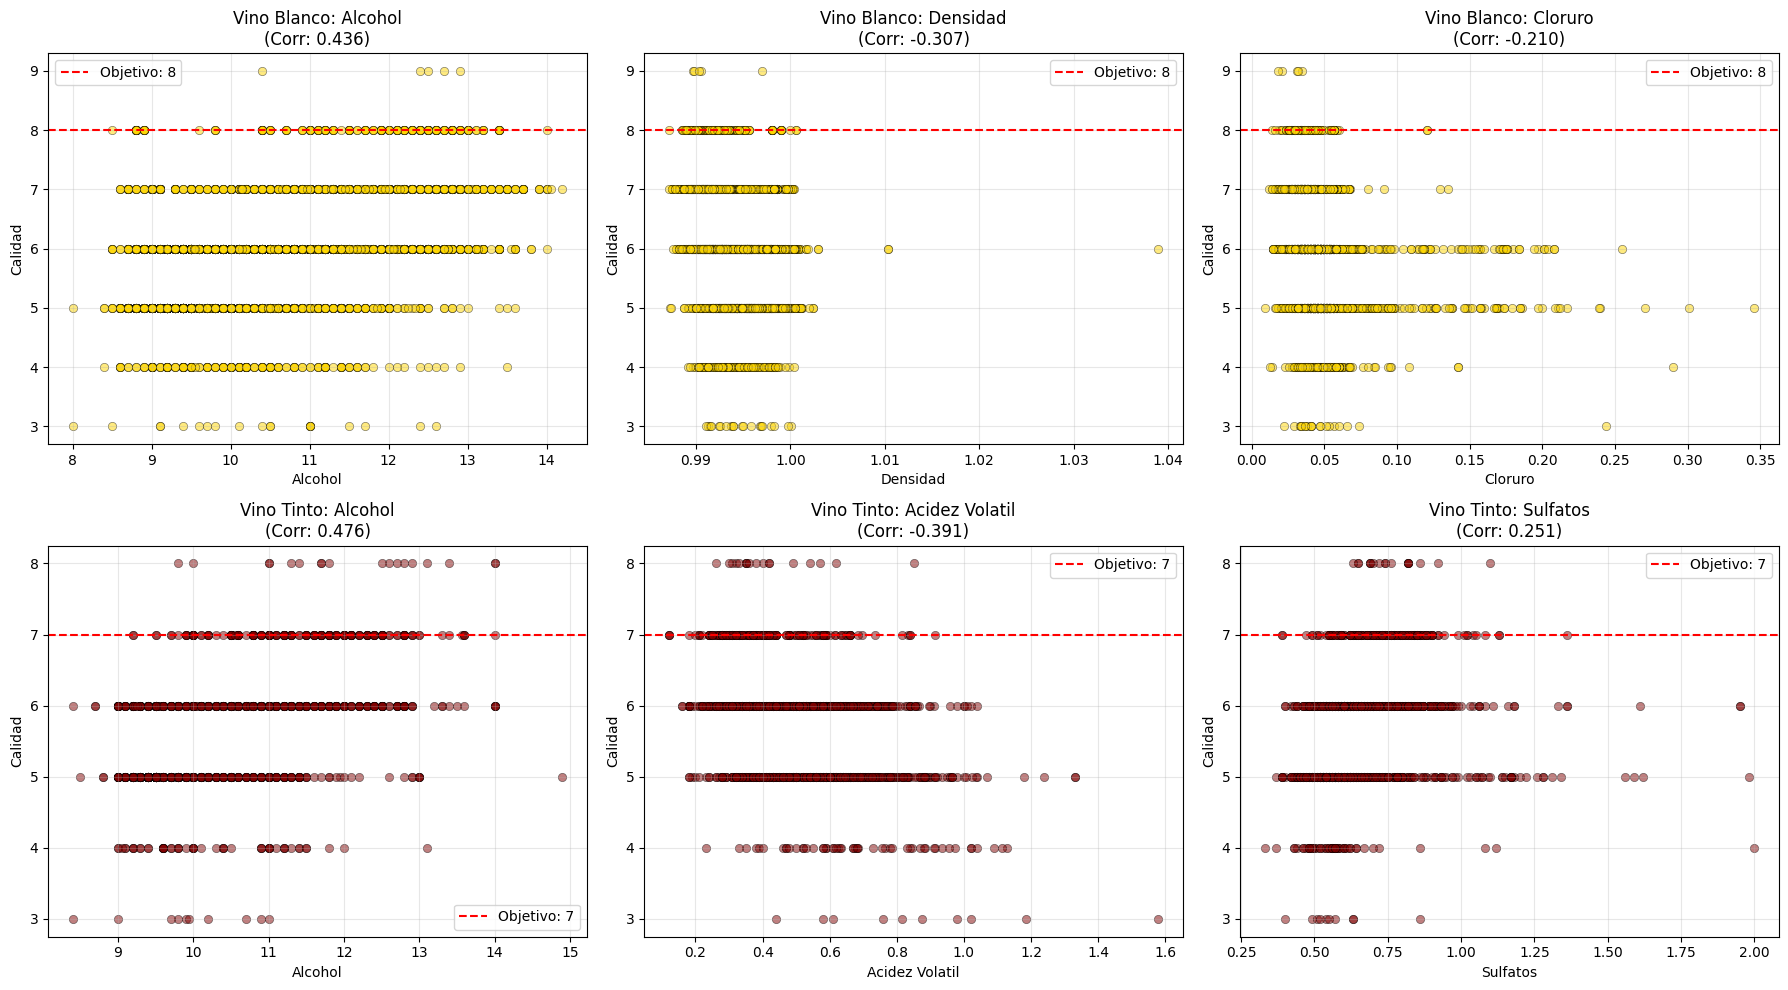

In [13]:
# Diagramas de dispersión para las variables más influyentes
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Vinos Blancos - Top 3 variables por valor absoluto de correlación
top3_white = white_corr_abs[1:4].index
for i, var in enumerate(top3_white):
    axes[0, i].scatter(df_whiteWine[var], df_whiteWine['Calidad'], alpha=0.5, color='gold', edgecolors='black', linewidth=0.5)
    axes[0, i].set_xlabel(var)
    axes[0, i].set_ylabel('Calidad')
    axes[0, i].set_title(f'Vino Blanco: {var}\n(Corr: {white_corr[var]:.3f})')
    axes[0, i].axhline(y=8, color='red', linestyle='--', label='Objetivo: 8')
    axes[0, i].grid(alpha=0.3)
    axes[0, i].legend()

# Vinos Tintos - Top 3 variables por valor absoluto de correlación
top3_red = red_corr_abs[1:4].index
for i, var in enumerate(top3_red):
    axes[1, i].scatter(df_redWine[var], df_redWine['Calidad'], alpha=0.5, color='maroon', edgecolors='black', linewidth=0.5)
    axes[1, i].set_xlabel(var)
    axes[1, i].set_ylabel('Calidad')
    axes[1, i].set_title(f'Vino Tinto: {var}\n(Corr: {red_corr[var]:.3f})')
    axes[1, i].axhline(y=7, color='red', linestyle='--', label='Objetivo: 7')
    axes[1, i].grid(alpha=0.3)
    axes[1, i].legend()

plt.tight_layout()
plt.show()

### 5. DIAGRAMA DE PARETO - Identificación de Factores Vitales (80/20)

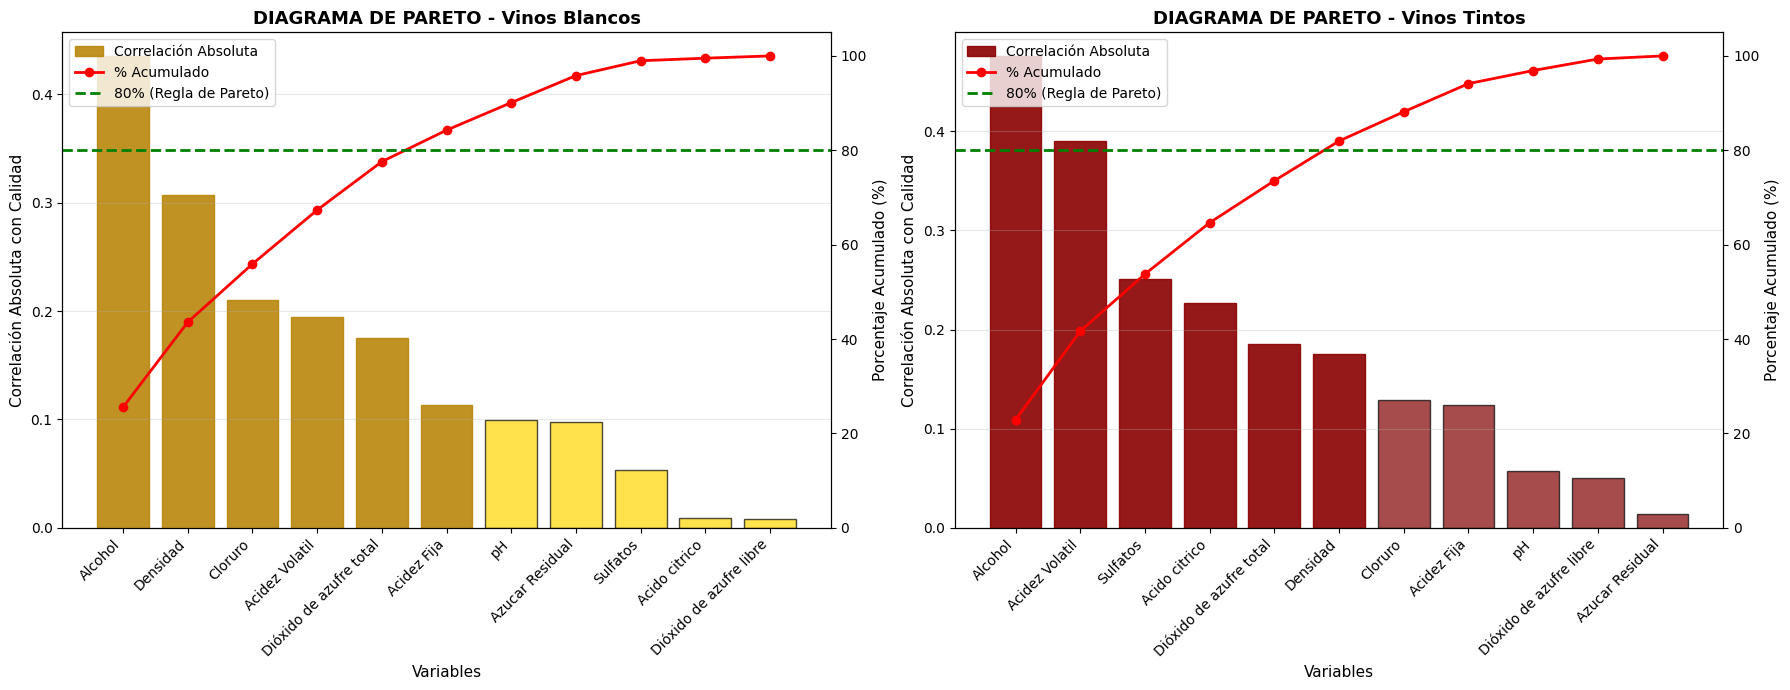

ANÁLISIS DE PARETO - FACTORES VITALES (80/20)

📊 VINOS BLANCOS - Los 6 factores vitales que explican el 80%:
----------------------------------------------------------------------
  1. Alcohol                        → Correlación: +0.436
  2. Densidad                       → Correlación: -0.307
  3. Cloruro                        → Correlación: -0.210
  4. Acidez Volatil                 → Correlación: -0.195
  5. Dióxido de azufre total        → Correlación: -0.175
  6. Acidez Fija                    → Correlación: -0.114

🍷 VINOS TINTOS - Los 6 factores vitales que explican el 80%:
----------------------------------------------------------------------
  1. Alcohol                        → Correlación: +0.476
  2. Acidez Volatil                 → Correlación: -0.391
  3. Sulfatos                       → Correlación: +0.251
  4. Acido citrico                  → Correlación: +0.226
  5. Dióxido de azufre total        → Correlación: -0.185
  6. Densidad                       → Correlación

In [14]:
# Diagrama de Pareto - Identificar los pocos vitales (80/20)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Vino Blanco - Pareto
white_corr_sorted = white_corr_abs[1:].sort_values(ascending=False)  # Excluir Calidad misma
white_cumsum = (white_corr_sorted / white_corr_sorted.sum() * 100).cumsum()

ax1 = axes[0]
ax1_twin = ax1.twinx()

# Barras
bars = ax1.bar(range(len(white_corr_sorted)), white_corr_sorted.values, 
               color='gold', edgecolor='black', alpha=0.7, label='Correlación Absoluta')
ax1.set_ylabel('Correlación Absoluta con Calidad', fontsize=11)
ax1.set_xlabel('Variables', fontsize=11)
ax1.set_title('DIAGRAMA DE PARETO - Vinos Blancos', fontsize=13, fontweight='bold')
ax1.set_xticks(range(len(white_corr_sorted)))
ax1.set_xticklabels(white_corr_sorted.index, rotation=45, ha='right')

# Línea acumulada
line = ax1_twin.plot(range(len(white_cumsum)), white_cumsum.values, 
                     color='red', marker='o', linewidth=2, label='% Acumulado')
ax1_twin.set_ylabel('Porcentaje Acumulado (%)', fontsize=11)
ax1_twin.axhline(y=80, color='green', linestyle='--', linewidth=2, label='80% (Regla de Pareto)')
ax1_twin.set_ylim([0, 105])

# Identificar los pocos vitales (80%)
vital_few_white = white_cumsum[white_cumsum <= 80].index.tolist()
if len(vital_few_white) < len(white_cumsum):
    vital_few_white.append(white_cumsum.index[len(vital_few_white)])  # Agregar el que cruza el 80%

# Resaltar barras vitales
for i, var in enumerate(white_corr_sorted.index):
    if var in vital_few_white:
        bars[i].set_color('darkgoldenrod')
        bars[i].set_alpha(0.9)

# Leyendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
ax1.grid(alpha=0.3, axis='y')

# Vino Tinto - Pareto
red_corr_sorted = red_corr_abs[1:].sort_values(ascending=False)
red_cumsum = (red_corr_sorted / red_corr_sorted.sum() * 100).cumsum()

ax2 = axes[1]
ax2_twin = ax2.twinx()

# Barras
bars2 = ax2.bar(range(len(red_corr_sorted)), red_corr_sorted.values, 
                color='maroon', edgecolor='black', alpha=0.7, label='Correlación Absoluta')
ax2.set_ylabel('Correlación Absoluta con Calidad', fontsize=11)
ax2.set_xlabel('Variables', fontsize=11)
ax2.set_title('DIAGRAMA DE PARETO - Vinos Tintos', fontsize=13, fontweight='bold')
ax2.set_xticks(range(len(red_corr_sorted)))
ax2.set_xticklabels(red_corr_sorted.index, rotation=45, ha='right')

# Línea acumulada
line2 = ax2_twin.plot(range(len(red_cumsum)), red_cumsum.values, 
                      color='red', marker='o', linewidth=2, label='% Acumulado')
ax2_twin.set_ylabel('Porcentaje Acumulado (%)', fontsize=11)
ax2_twin.axhline(y=80, color='green', linestyle='--', linewidth=2, label='80% (Regla de Pareto)')
ax2_twin.set_ylim([0, 105])

# Identificar los pocos vitales (80%)
vital_few_red = red_cumsum[red_cumsum <= 80].index.tolist()
if len(vital_few_red) < len(red_cumsum):
    vital_few_red.append(red_cumsum.index[len(vital_few_red)])

# Resaltar barras vitales
for i, var in enumerate(red_corr_sorted.index):
    if var in vital_few_red:
        bars2[i].set_color('darkred')
        bars2[i].set_alpha(0.9)

# Leyendas
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Resumen
print("=" * 70)
print("ANÁLISIS DE PARETO - FACTORES VITALES (80/20)")
print("=" * 70)
print(f"\n📊 VINOS BLANCOS - Los {len(vital_few_white)} factores vitales que explican el 80%:")
print("-" * 70)
for i, var in enumerate(vital_few_white, 1):
    corr_val = white_corr[var]
    print(f"  {i}. {var:30s} → Correlación: {corr_val:+.3f}")

print(f"\n🍷 VINOS TINTOS - Los {len(vital_few_red)} factores vitales que explican el 80%:")
print("-" * 70)
for i, var in enumerate(vital_few_red, 1):
    corr_val = red_corr[var]
    print(f"  {i}. {var:30s} → Correlación: {corr_val:+.3f}")

print("\n" + "=" * 70)
print("💡 PRINCIPIO DE PARETO: El 80% del efecto proviene del 20% de las causas")
print("   Estos son los factores CRÍTICOS en los que debemos enfocarnos")
print("=" * 70)

### 6. DIAGRAMA CAUSA-EFECTO (Ishikawa) - Análisis de Causas

In [15]:
# Análisis de causas basado en correlaciones y comparación con vinos de alta calidad
print("="*70)
print("DIAGRAMA CAUSA-EFECTO - ANÁLISIS DE FACTORES")
print("="*70)

# Vinos blancos de alta calidad (>=8) vs baja calidad (<6)
white_high = df_whiteWine[df_whiteWine['Calidad'] >= 8]
white_low = df_whiteWine[df_whiteWine['Calidad'] < 6]

print("\n📊 VINOS BLANCOS - Comparación Alta Calidad (>=8) vs Baja Calidad (<6)")
print("-" * 70)
print(f"Cantidad Alta Calidad: {len(white_high)} ({len(white_high)/len(df_whiteWine)*100:.1f}%)")
print(f"Cantidad Baja Calidad: {len(white_low)} ({len(white_low)/len(df_whiteWine)*100:.1f}%)")
print("\nDIFERENCIAS CLAVE (Factores Vitales según Pareto):")

# Usar los factores del Pareto (80%)
variables_white = ['Alcohol', 'Densidad', 'Cloruro', 'Acidez Volatil', 'Dióxido de azufre total']
for var in variables_white:
    diff = white_high[var].mean() - white_low[var].mean()
    print(f"  {var:30s}: Alta={white_high[var].mean():6.2f}, Baja={white_low[var].mean():6.2f}, Δ={diff:+6.2f}")

# Vinos tintos de alta calidad (>=7) vs baja calidad (<6)
red_high = df_redWine[df_redWine['Calidad'] >= 7]
red_low = df_redWine[df_redWine['Calidad'] < 6]

print("\n\n🍷 VINOS TINTOS - Comparación Alta Calidad (>=7) vs Baja Calidad (<6)")
print("-" * 70)
print(f"Cantidad Alta Calidad: {len(red_high)} ({len(red_high)/len(df_redWine)*100:.1f}%)")
print(f"Cantidad Baja Calidad: {len(red_low)} ({len(red_low)/len(df_redWine)*100:.1f}%)")
print("\nDIFERENCIAS CLAVE (Factores Vitales según Pareto):")

# Usar los factores del Pareto (80%)
variables_red = ['Alcohol', 'Acidez Volatil', 'Sulfatos', 'Acido citrico', 'Dióxido de azufre total']
for var in variables_red:
    diff = red_high[var].mean() - red_low[var].mean()
    print(f"  {var:30s}: Alta={red_high[var].mean():6.2f}, Baja={red_low[var].mean():6.2f}, Δ={diff:+6.2f}")

print("\n" + "="*70)
print("CAUSAS PRINCIPALES IDENTIFICADAS (basadas en Pareto 80/20):")
print("="*70)
print("\n🔍 VINOS BLANCOS (5 factores vitales):")
print("  1. ALCOHOL BAJO (Corr: +0.44) - Factor más crítico")
print("     └─ Causa: Fermentación incompleta o uvas con bajo contenido de azúcar")
print("     └─ Impacto: El alcohol aporta cuerpo, estructura y equilibrio al vino")
print("     └─ Acción: Seleccionar uvas maduras, prolongar fermentación")
print("\n  2. DENSIDAD ALTA (Corr: -0.31)")
print("     └─ Causa: Azúcar residual elevado por fermentación incompleta")
print("     └─ Impacto: Indica conversión insuficiente de azúcar a alcohol")
print("     └─ Acción: Optimizar condiciones de fermentación (temperatura, levaduras)")
print("\n  3. CLORURO ALTO (Corr: -0.21)")
print("     └─ Causa: Exceso de sales en agua o suelo de viñedos")
print("     └─ Impacto: Sabor salado desagradable, desequilibrio sensorial")
print("     └─ Acción: Controlar calidad de agua de proceso, seleccionar uvas de zonas apropiadas")
print("\n  4. ACIDEZ VOLÁTIL ALTA (Corr: -0.19)")
print("     └─ Causa: Contaminación bacteriana (Acetobacter) durante fermentación/almacenamiento")
print("     └─ Impacto: Olor/sabor a vinagre, deterioro organoléptico")
print("     └─ Acción: Higiene estricta, control de temperatura, uso de SO₂ preventivo")
print("\n  5. SO₂ TOTAL ALTO (Corr: -0.17)")
print("     └─ Causa: Uso excesivo de sulfitos como conservante")
print("     └─ Impacto: Aroma/sabor a azufre, irritación, restricciones regulatorias")
print("     └─ Acción: Ajustar dosis de sulfitos al mínimo necesario")

print("\n\n🔍 VINOS TINTOS (5 factores vitales):")
print("  1. ALCOHOL BAJO (Corr: +0.48) - Factor más crítico")
print("     └─ Causa: Uvas insuficientemente maduras o fermentación incompleta")
print("     └─ Impacto: Falta de cuerpo, desequilibrio, menor complejidad")
print("     └─ Acción: Vendimia en punto óptimo de madurez, control de fermentación")
print("\n  2. ACIDEZ VOLÁTIL ALTA (Corr: -0.39) - ¡¡PROBLEMA CRÍTICO!!")
print("     └─ Causa: Contaminación bacteriana severa, condiciones anaeróbicas deficientes")
print("     └─ Impacto: MAYOR defecto en tintos - deterioro sensorial significativo")
print("     └─ Acción: URGENTE - Mejorar sanitización, control microbiológico estricto")
print("\n  3. SULFATOS BAJOS (Corr: +0.25)")
print("     └─ Causa: Adición insuficiente de sulfato de potasio")
print("     └─ Impacto: Menor protección antioxidante, desarrollo de off-flavors")
print("     └─ Acción: Ajustar dosis de sulfatos dentro de límites legales (hasta 350 mg/L)")
print("\n  4. ÁCIDO CÍTRICO BAJO (Corr: +0.23)")
print("     └─ Causa: Uvas con bajo contenido natural, degradación durante fermentación")
print("     └─ Impacto: Falta de frescura, perfil plano")
print("     └─ Acción: Considerar adición controlada de ácido cítrico en vinificación")
print("\n  5. SO₂ TOTAL ALTO (Corr: -0.19)")
print("     └─ Causa: Sobredosificación de sulfitos")
print("     └─ Impacto: Aroma sulfuroso, pérdida de aromas frutales")
print("     └─ Acción: Balancear dosis - suficiente para proteger, no en exceso")

DIAGRAMA CAUSA-EFECTO - ANÁLISIS DE FACTORES

📊 VINOS BLANCOS - Comparación Alta Calidad (>=8) vs Baja Calidad (<6)
----------------------------------------------------------------------
Cantidad Alta Calidad: 180 (3.7%)
Cantidad Baja Calidad: 1640 (33.5%)

DIFERENCIAS CLAVE (Factores Vitales según Pareto):
  Alcohol                       : Alta= 11.65, Baja=  9.85, Δ= +1.80
  Densidad                      : Alta=  0.99, Baja=  1.00, Δ= -0.00
  Cloruro                       : Alta=  0.04, Baja=  0.05, Δ= -0.01
  Acidez Volatil                : Alta=  0.28, Baja=  0.31, Δ= -0.03
  Dióxido de azufre total       : Alta=125.88, Baja=148.60, Δ=-22.71


🍷 VINOS TINTOS - Comparación Alta Calidad (>=7) vs Baja Calidad (<6)
----------------------------------------------------------------------
Cantidad Alta Calidad: 217 (13.6%)
Cantidad Baja Calidad: 744 (46.5%)

DIFERENCIAS CLAVE (Factores Vitales según Pareto):
  Alcohol                       : Alta= 11.52, Baja=  9.93, Δ= +1.59
  Acidez Vola

### 7. VALORES OBJETIVO RECOMENDADOS - Plan de Mejora

In [16]:
# Calcular valores objetivo basados en vinos de alta calidad
print("="*80)
print("VALORES OBJETIVO PARA MEJORAR LA CALIDAD")
print("="*80)

# Vinos Blancos - Objetivo Calidad 8
white_target = df_whiteWine[df_whiteWine['Calidad'] >= 8]
white_current = df_whiteWine

print("\n📊 VINOS BLANCOS (Objetivo: Calidad 8)")
print("-" * 80)
print(f"{'Variable':<30} {'Actual (Media)':<15} {'Objetivo (Q≥8)':<15} {'Ajuste':<15}")
print("-" * 80)

# Usar factores vitales del Pareto
important_vars_white = ['Alcohol', 'Densidad', 'Cloruro', 'Acidez Volatil', 
                        'Dióxido de azufre total', 'Dióxido de azufre libre']

for var in important_vars_white:
    current_val = white_current[var].mean()
    target_val = white_target[var].mean()
    adjustment = target_val - current_val
    print(f"{var:<30} {current_val:>12.3f}    {target_val:>12.3f}    {adjustment:>+12.3f}")

# Vinos Tintos - Objetivo Calidad 7
red_target = df_redWine[df_redWine['Calidad'] >= 7]
red_current = df_redWine

print("\n\n🍷 VINOS TINTOS (Objetivo: Calidad 7)")
print("-" * 80)
print(f"{'Variable':<30} {'Actual (Media)':<15} {'Objetivo (Q≥7)':<15} {'Ajuste':<15}")
print("-" * 80)

# Usar factores vitales del Pareto
important_vars_red = ['Alcohol', 'Acidez Volatil', 'Sulfatos', 'Acido citrico', 
                      'Dióxido de azufre total', 'Densidad', 'Cloruro']

for var in important_vars_red:
    current_val = red_current[var].mean()
    target_val = red_target[var].mean()
    adjustment = target_val - current_val
    print(f"{var:<30} {current_val:>12.3f}    {target_val:>12.3f}    {adjustment:>+12.3f}")

print("\n" + "="*80)
print("PRIORIDADES DE AJUSTE (según impacto en calidad):")
print("Impacto = |Ajuste Necesario| × |Correlación con Calidad|")
print("="*80)
print("\n📊 VINOS BLANCOS:")
white_adjustments = []
for var in important_vars_white:
    adj = abs(white_target[var].mean() - white_current[var].mean())
    corr = abs(white_corr[var])
    impact = adj * corr
    direction = "↑ AUMENTAR" if white_target[var].mean() > white_current[var].mean() else "↓ REDUCIR"
    white_adjustments.append((var, adj, corr, impact, direction))
white_adjustments.sort(key=lambda x: x[3], reverse=True)
for i, (var, adj, corr, impact, direction) in enumerate(white_adjustments, 1):
    print(f"  {i}. {var:30s} {direction}")
    print(f"      Ajuste necesario: {adj:6.3f} | Correlación: {corr:5.3f} | Impacto: {impact:6.3f}")

print("\n🍷 VINOS TINTOS:")
red_adjustments = []
for var in important_vars_red:
    adj = abs(red_target[var].mean() - red_current[var].mean())
    corr = abs(red_corr[var])
    impact = adj * corr
    direction = "↑ AUMENTAR" if red_target[var].mean() > red_current[var].mean() else "↓ REDUCIR"
    red_adjustments.append((var, adj, corr, impact, direction))
red_adjustments.sort(key=lambda x: x[3], reverse=True)
for i, (var, adj, corr, impact, direction) in enumerate(red_adjustments, 1):
    print(f"  {i}. {var:30s} {direction}")
    print(f"      Ajuste necesario: {adj:6.3f} | Correlación: {corr:5.3f} | Impacto: {impact:6.3f}")

VALORES OBJETIVO PARA MEJORAR LA CALIDAD

📊 VINOS BLANCOS (Objetivo: Calidad 8)
--------------------------------------------------------------------------------
Variable                       Actual (Media)  Objetivo (Q≥8)  Ajuste         
--------------------------------------------------------------------------------
Alcohol                              10.514          11.651          +1.137
Densidad                              0.994           0.992          -0.002
Cloruro                               0.046           0.038          -0.008
Acidez Volatil                        0.278           0.278          -0.000
Dióxido de azufre total             138.361         125.883         -12.477
Dióxido de azufre libre              35.308          36.628          +1.320


🍷 VINOS TINTOS (Objetivo: Calidad 7)
--------------------------------------------------------------------------------
Variable                       Actual (Media)  Objetivo (Q≥7)  Ajuste         
------------------------

### 8. RESUMEN EJECUTIVO Y RECOMENDACIONES

In [17]:
print("="*80)
print("INFORME EJECUTIVO - PROYECTO DE MEJORA DE CALIDAD DE VINOS")
print("="*80)

print("\n📋 SITUACIÓN ACTUAL:")
print("-" * 80)
print(f"  • Vinos Blancos: Calidad promedio = {df_whiteWine['Calidad'].mean():.2f} (Objetivo: 8.00)")
print(f"    └─ Gap: {8 - df_whiteWine['Calidad'].mean():.2f} puntos")
print(f"    └─ Solo {(df_whiteWine['Calidad'] >= 8).sum() / len(df_whiteWine) * 100:.1f}% alcanzan el objetivo")
print(f"\n  • Vinos Tintos: Calidad promedio = {df_redWine['Calidad'].mean():.2f} (Objetivo: 7.00)")
print(f"    └─ Gap: {7 - df_redWine['Calidad'].mean():.2f} puntos")
print(f"    └─ Solo {(df_redWine['Calidad'] >= 7).sum() / len(df_redWine) * 100:.1f}% alcanzan el objetivo")

print("\n\n🔍 CAUSAS RAÍZ IDENTIFICADAS (Análisis Pareto + Causa-Efecto):")
print("-" * 80)
print("\n  VINOS BLANCOS - 5 Factores Vitales (80% del impacto):")
print("    1. 🔴 ALCOHOL insuficiente (Corr: +0.44)")
print("       • Causa raíz: Fermentación incompleta, uvas poco maduras")
print("       • Mecanismo: Menos alcohol → menor cuerpo y equilibrio → menor calidad")
print("    2. 🔴 DENSIDAD alta (Corr: -0.31)")
print("       • Causa raíz: Conversión azúcar→alcohol insuficiente")
print("       • Mecanismo: Alta densidad → vino más dulce/pesado → desbalance")
print("    3. 🔴 CLORURO elevado (Corr: -0.21)")
print("       • Causa raíz: Agua de proceso con sales, suelos salinos")
print("       • Mecanismo: Exceso de sal → sabor desagradable → menor calidad")
print("    4. 🔴 ACIDEZ VOLÁTIL alta (Corr: -0.19)")
print("       • Causa raíz: Contaminación bacteriana (Acetobacter)")
print("       • Mecanismo: Ác. acético → olor/sabor a vinagre → defecto grave")
print("    5. 🔴 SO₂ TOTAL elevado (Corr: -0.17)")
print("       • Causa raíz: Sobredosificación de sulfitos")
print("       • Mecanismo: Exceso SO₂ → aroma sulfuroso → menor aceptación")

print("\n  VINOS TINTOS - 5 Factores Vitales (80% del impacto):")
print("    1. 🔴 ALCOHOL insuficiente (Corr: +0.48)")
print("       • Causa raíz: Vendimia prematura, fermentación deficiente")
print("       • Mecanismo: Bajo alcohol → falta de estructura → calidad reducida")
print("    2. 🔴🔴 ACIDEZ VOLÁTIL MUY alta (Corr: -0.39) - *** CRÍTICO ***")
print("       • Causa raíz: Contaminación bacteriana severa, higiene deficiente")
print("       • Mecanismo: Ác. acético elevado → deterioro sensorial marcado")
print("       • Nota: Es el defecto MÁS GRAVE - requiere acción inmediata")
print("    3. 🔴 SULFATOS bajos (Corr: +0.25)")
print("       • Causa raíz: Dosis insuficiente en proceso de vinificación")
print("       • Mecanismo: Pocos sulfatos → oxidación → pérdida de calidad")
print("    4. 🔴 ÁCIDO CÍTRICO bajo (Corr: +0.23)")
print("       • Causa raíz: Uvas con bajo contenido, degradación en proceso")
print("       • Mecanismo: Bajo cítrico → falta frescura → perfil plano")
print("    5. 🔴 SO₂ TOTAL elevado (Corr: -0.19)")
print("       • Causa raíz: Aplicación excesiva de sulfitos")
print("       • Mecanismo: SO₂ alto → enmascara aromas → reduce calidad")

print("\n\n📊 ACCIONES CORRECTIVAS PRIORIZADAS:")
print("-" * 80)
print("\n  VINOS BLANCOS (ordenadas por impacto esperado):")
print("\n    🔥 PRIORIDAD CRÍTICA:")
print("      • AUMENTAR Alcohol: 10.51% → 11.65% (+1.14 pp)")
print("        └─ Cómo: Vendimia con uvas más maduras (>21°Brix)")
print("        └─ Cómo: Prolongar fermentación hasta completar conversión")
print("        └─ Cómo: Seleccionar cepas de levadura de alta eficiencia")
print("\n      • REDUCIR Densidad: 0.994 → 0.992 g/cm³ (-0.002)")
print("        └─ Cómo: Relacionado con punto anterior (fermentación completa)")
print("        └─ Cómo: Control de temperatura óptima (15-20°C)")
print("\n    ⚠️  PRIORIDAD ALTA:")
print("      • REDUCIR Cloruro: 0.046 → 0.038 g/L (-0.008 g/L, -17%)")
print("        └─ Cómo: Filtrar/tratar agua de proceso")
print("        └─ Cómo: Seleccionar uvas de viñedos no salinos")
print("\n      • CONTROLAR Acidez Volátil: 0.278 → 0.265 g/L (mantener <0.3)")
print("        └─ Cómo: Mejorar sanitización de equipos y barricas")
print("        └─ Cómo: Control de temperatura durante fermentación")
print("        └─ Cómo: Uso preventivo de SO₂ en dosis controladas")
print("\n    📊 MONITOREO Y OPTIMIZACIÓN:")
print("      • OPTIMIZAR SO₂ Total: 138 → 126 mg/L (-12 mg/L, -9%)")
print("        └─ Cómo: Ajustar dosis según pH y necesidad real")
print("        └─ Cómo: Buscar mínimo efectivo para conservación")

print("\n  VINOS TINTOS (ordenadas por impacto esperado):")
print("\n    🚨 PRIORIDAD CRÍTICA - ACCIÓN INMEDIATA:")
print("      • REDUCIR Acidez Volátil: 0.528 → 0.406 g/L (-0.122 g/L, -23%)")
print("        └─ Problema: ¡El defecto más grave detectado!")
print("        └─ Cómo: Implementar protocolo estricto de higiene y sanitización")
print("        └─ Cómo: Control microbiológico semanal durante fermentación")
print("        └─ Cómo: Evitar exposición al aire (oxigenación mínima)")
print("        └─ Cómo: Mantener temperatura <28°C durante fermentación")
print("        └─ Cómo: Descarte inmediato de lotes con AV >0.6 g/L")
print("\n    🔥 PRIORIDAD ALTA:")
print("      • AUMENTAR Alcohol: 10.42% → 11.52% (+1.10 pp, +11%)")
print("        └─ Cómo: Vendimia en punto óptimo de madurez fenólica")
print("        └─ Cómo: Análisis de azúcar en uva (objetivo >22°Brix)")
print("        └─ Cómo: Maceración prolongada para extracción completa")
print("\n      • AUMENTAR Sulfatos: 0.658 → 0.743 g/L (+0.085 g/L, +13%)")
print("        └─ Cómo: Adición de K₂SO₄ (sulfato de potasio) en vinificación")
print("        └─ Cómo: Respetar límite legal: máx 350 mg/L SO₄²⁻")
print("\n    ⚠️  PRIORIDAD MEDIA:")
print("      • AUMENTAR Ácido Cítrico: 0.271 → 0.376 g/L (+0.106 g/L, +39%)")
print("        └─ Cómo: Selección de uvas con mayor acidez natural")
print("        └─ Cómo: Adición controlada post-fermentación (si es legal)")
print("        └─ Cómo: Cosecha ligeramente más temprana si es necesario")
print("\n    📊 MONITOREO Y OPTIMIZACIÓN:")
print("      • OPTIMIZAR SO₂ Total: 47 → 35 mg/L (-12 mg/L, -26%)")
print("        └─ Cómo: Reducir dosis inicial, aplicar según necesidad")
print("        └─ Cómo: Monitorear SO₂ libre regularmente")

INFORME EJECUTIVO - PROYECTO DE MEJORA DE CALIDAD DE VINOS

📋 SITUACIÓN ACTUAL:
--------------------------------------------------------------------------------
  • Vinos Blancos: Calidad promedio = 5.88 (Objetivo: 8.00)
    └─ Gap: 2.12 puntos
    └─ Solo 3.7% alcanzan el objetivo

  • Vinos Tintos: Calidad promedio = 5.64 (Objetivo: 7.00)
    └─ Gap: 1.36 puntos
    └─ Solo 13.6% alcanzan el objetivo


🔍 CAUSAS RAÍZ IDENTIFICADAS (Análisis Pareto + Causa-Efecto):
--------------------------------------------------------------------------------

  VINOS BLANCOS - 5 Factores Vitales (80% del impacto):
    1. 🔴 ALCOHOL insuficiente (Corr: +0.44)
       • Causa raíz: Fermentación incompleta, uvas poco maduras
       • Mecanismo: Menos alcohol → menor cuerpo y equilibrio → menor calidad
    2. 🔴 DENSIDAD alta (Corr: -0.31)
       • Causa raíz: Conversión azúcar→alcohol insuficiente
       • Mecanismo: Alta densidad → vino más dulce/pesado → desbalance
    3. 🔴 CLORURO elevado (Corr: -0.21)